# Detecting Communities

1. Complete a basic community detection algorithm on MA data

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
# read files
# Cook
flow_20_march_week4_cook = gpd.read_file('../../data/processed_small_data/flow_20_march_week4_Cook_shp.geojson')
flow_16_acs_cook = gpd.read_file('../../data/processed_small_data/flow_16_acs_Cook_shp.geojson')
cook_tracts = gpd.read_file('../../data/processed_small_data/us_tract_Cook_shp.geojson')
# MA
flow_20_march_week4_ma = gpd.read_file('../../data/processed_small_data/flow_20_march_week4_MA_shp.geojson')
flow_16_acs_ma = gpd.read_file('../../data/processed_small_data/flow_16_acs_MA_shp.geojson')
ma_tracts = gpd.read_file('../../data/processed_small_data/us_tract_MA_shp.geojson')


In [42]:
ma_tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,hh_worker_2_more,pct_worker_2_more,binge,bphigh,chd,diabetes,obesity,lpa,total_pop_cdc,geometry
0,25,027,724100,25027724100,7241,Census Tract 7241,G5020,S,53034202,1639215,...,577,37.54,18.0,33.5,6.9,9.4,30.7,25.3,3701,"POLYGON ((-72.21782 42.27018, -72.21765 42.270..."
1,25,027,759100,25027759100,7591,Census Tract 7591,G5020,S,25570219,1427831,...,358,43.34,20.5,28.9,5.8,8.3,31.1,23.4,2183,"POLYGON ((-72.07888 42.21475, -72.07880 42.214..."
2,25,025,091300,25025091300,913,Census Tract 913,G5020,S,262560,0,...,316,37.00,18.8,29.1,6.2,11.6,28.0,32.3,2499,"POLYGON ((-71.07220 42.32136, -71.07174 42.321..."
3,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,...,623,45.67,22.8,24.8,4.8,7.1,20.6,19.2,3253,"POLYGON ((-71.14777 42.28599, -71.14739 42.286..."
4,25,025,030500,25025030500,305,Census Tract 305,G5020,S,193673,292691,...,481,31.83,29.1,16.0,2.8,3.8,15.5,12.5,2538,"POLYGON ((-71.05979 42.36877, -71.05883 42.369..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,25,005,610203,25005610203,6102.03,Census Tract 6102.03,G5020,S,14218546,245820,...,1303,56.58,22.4,25.6,4.5,6.4,26.0,17.3,6883,"POLYGON ((-71.22550 42.01822, -71.22373 42.018..."
1455,25,005,611202,25005611202,6112.02,Census Tract 6112.02,G5020,S,16516218,2043930,...,1122,46.00,21.8,27.9,5.5,7.6,27.7,21.0,6396,"POLYGON ((-71.25929 41.97422, -71.24939 41.977..."
1456,25,005,611102,25005611102,6111.02,Census Tract 6111.02,G5020,S,17393046,622677,...,649,50.35,25.4,20.6,3.7,5.4,24.6,18.2,5047,"POLYGON ((-71.21047 41.95602, -71.20995 41.956..."
1457,25,005,653204,25005653204,6532.04,Census Tract 6532.04,G5020,S,12475485,58547,...,523,43.01,20.5,30.8,6.7,9.1,28.6,24.4,3214,"POLYGON ((-71.00314 41.60654, -71.00313 41.606..."


In [8]:
flow_20_march_week4_ma.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows,geometry
0,25001012700,25017342400,-70.341803,41.645342,-71.062198,42.398850,03/23/20 - 03/29/20,4,109.0,"LINESTRING (2095835.909 2355892.236, 2016504.4..."
1,25001012700,25001015300,-70.341803,41.645342,-70.290085,41.673588,03/23/20 - 03/29/20,215,5883.0,"LINESTRING (2095835.909 2355892.236, 2099112.2..."
2,25001012700,25001010400,-70.341803,41.645342,-69.983433,41.757063,03/23/20 - 03/29/20,20,547.0,"LINESTRING (2095835.909 2355892.236, 2120999.0..."
3,25001012700,25023545100,-70.341803,41.645342,-70.754009,41.768764,03/23/20 - 03/29/20,4,109.0,"LINESTRING (2095835.909 2355892.236, 2059342.3..."
4,25001012700,25025081001,-70.341803,41.645342,-71.106830,42.334567,03/23/20 - 03/29/20,4,109.0,"LINESTRING (2095835.909 2355892.236, 2014839.6..."


# Visual intuition

In [55]:
ma_tracts=ma_tracts.to_crs('EPSG:4269')
flow_20_march_week4_ma=flow_20_march_week4_ma.to_crs('EPSG:4269')

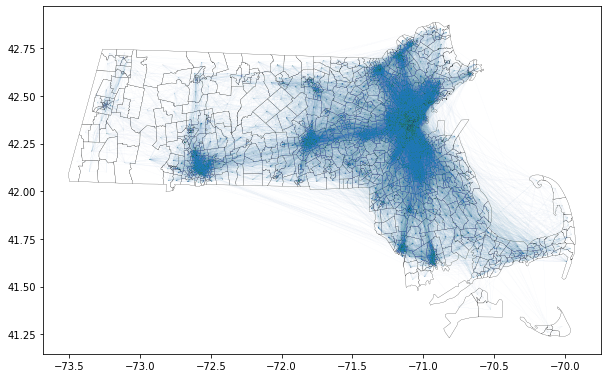

In [56]:
# 
fig,ax = plt.subplots(figsize= (10,10))
ma_tracts.plot(facecolor='w',edgecolor='k',linewidth=0.2,ax=ax)
flow_20_march_week4_ma.plot(linewidth = 0.01, ax=ax)


In [52]:
flow_20_march_week4_ma.crs

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,binge,bphigh,chd,diabetes,obesity,lpa,total_pop_cdc,geometry,geoid,community_idx
0,25,027,724100,25027724100,7241,Census Tract 7241,G5020,S,53034202,1639215,...,18.0,33.5,6.9,9.4,30.7,25.3,3701,"POLYGON ((1928630.356 2383718.939, 1928643.995...",25027724100,1
1,25,027,759100,25027759100,7591,Census Tract 7591,G5020,S,25570219,1427831,...,20.5,28.9,5.8,8.3,31.1,23.4,2183,"POLYGON ((1941203.440 2380543.451, 1941204.414...",25027759100,1
2,25,025,091300,25025091300,913,Census Tract 913,G5020,S,262560,0,...,18.8,29.1,6.2,11.6,28.0,32.3,2499,"POLYGON ((2017960.728 2413043.192, 2017996.393...",25025091300,0
3,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,...,22.8,24.8,4.8,7.1,20.6,19.2,3253,"POLYGON ((2013005.784 2407620.894, 2013036.066...",25025110501,0
4,25,025,030500,25025030500,305,Census Tract 305,G5020,S,193673,292691,...,29.1,16.0,2.8,3.8,15.5,12.5,2538,"POLYGON ((2017566.861 2418426.166, 2017630.540...",25025030500,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,25,005,610203,25005610203,6102.03,Census Tract 6102.03,G5020,S,14218546,245820,...,22.4,25.6,4.5,6.4,26.0,17.3,6883,"POLYGON ((2014572.597 2377040.515, 2014708.408...",25005610203,0
1454,25,005,611202,25005611202,6112.02,Census Tract 6112.02,G5020,S,16516218,2043930,...,21.8,27.9,5.5,7.6,27.7,21.0,6396,"POLYGON ((2013154.728 2371568.120, 2013833.471...",25005611202,0
1455,25,005,611102,25005611102,6111.02,Census Tract 6111.02,G5020,S,17393046,622677,...,25.4,20.6,3.7,5.4,24.6,18.2,5047,"POLYGON ((2017561.254 2370636.959, 2017600.470...",25005611102,0
1456,25,005,653204,25005653204,6532.04,Census Tract 6532.04,G5020,S,12475485,58547,...,20.5,30.8,6.7,9.1,28.6,24.4,3214,"POLYGON ((2044213.840 2337297.265, 2044210.027...",25005653204,0


# Basic community detection - MA

sw: 1. how to use the weights? 2. how to control the number of clusters? 3. how to tie the clustering to segregation argument?

In [14]:
import networkx.algorithms.community as nxcom

In [10]:
flow_20_march_week4_ma_nx = nx.from_pandas_edgelist(flow_20_march_week4_ma,'geoid_o','geoid_d', edge_attr='pop_flows')

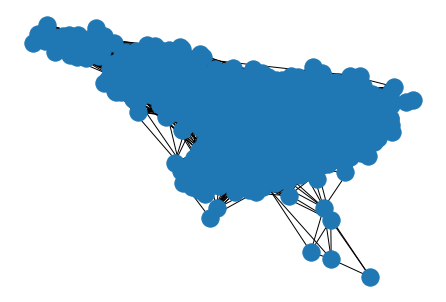

In [11]:
nx.draw(flow_20_march_week4_ma_nx)

In [16]:
# a basic modularity-based algorithm
communities = sorted(nxcom.greedy_modularity_communities(flow_20_march_week4_ma_nx), key=len, reverse=True)

#
print(len(communities))
print(len(c) for c in communities)


4
[frozenset({'25005631500', '25025100601', '25025080300', '25021412300', '25025110601', '25025010801', '25023523202', '25025130200', '25005641700', '25023510400', '25005640901', '25023522102', '25005631400', '25023530100', '25023509101', '25025100700', '25025092101', '25001014402', '25005630300', '25023522101', '25025010203', '25021402400', '25023520100', '25005610202', '25021413401', '25021417400', '25023545400', '25025080500', '25001011500', '25005650202', '25023503101', '25025090400', '25021456200', '25025081700', '25005644200', '25021456401', '25025090901', '25001012700', '25007200200', '25005614000', '25023543100', '25001010206', '25021415102', '25021441204', '25021457100', '25025000703', '25005644101', '25021400100', '25023530700', '25025130404', '25025081200', '25021416400', '25025100200', '25023524102', '25005611102', '25025010103', '25023510502', '25025090300', '25023503102', '25005655400', '25021417802', '25021422400', '25025070600', '25001013400', '25001012502', '2502500040

In [41]:
# get the community idx
c_list = list(map(sorted, communities))
c_dic = {}

for i in range(len(communities)):
    for idx in communities[i]:
        c_dic[idx] = i # assign community numbers to each zone

c_df = pd.DataFrame(list(c_dic.items()), columns = ['geoid','community_idx'])                
c_df

# c_df = pd.DataFrame(c_dic, index = len(c_dic.keys()))

,geoid,community_idx
0,25005631500,0
1,25025100601,0
2,25025080300,0
3,25021412300,0
4,25025110601,0
...,...,...
1453,25019950500,3
1454,25019950200,3
1455,25019950307,3
1456,25019950100,3


In [45]:
# merge
ma_tracts=ma_tracts.merge(c_df, left_on = 'GEOID', right_on = 'geoid', how = 'inner')

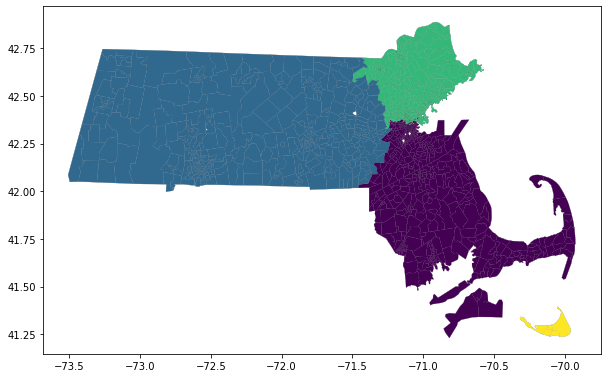

In [57]:
# communities
fig, ax = plt.subplots(figsize=(10,10))
ma_tracts.plot(facecolor='w', edgecolor='k',linewidth=0.2,ax=ax)
ma_tracts.plot(column='community_idx', ax=ax)


In [58]:
ma_tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,binge,bphigh,chd,diabetes,obesity,lpa,total_pop_cdc,geometry,geoid,community_idx
0,25,027,724100,25027724100,7241,Census Tract 7241,G5020,S,53034202,1639215,...,18.0,33.5,6.9,9.4,30.7,25.3,3701,"POLYGON ((-72.21782 42.27018, -72.21765 42.270...",25027724100,1
1,25,027,759100,25027759100,7591,Census Tract 7591,G5020,S,25570219,1427831,...,20.5,28.9,5.8,8.3,31.1,23.4,2183,"POLYGON ((-72.07888 42.21475, -72.07880 42.214...",25027759100,1
2,25,025,091300,25025091300,913,Census Tract 913,G5020,S,262560,0,...,18.8,29.1,6.2,11.6,28.0,32.3,2499,"POLYGON ((-71.07220 42.32136, -71.07174 42.321...",25025091300,0
3,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,...,22.8,24.8,4.8,7.1,20.6,19.2,3253,"POLYGON ((-71.14777 42.28599, -71.14739 42.286...",25025110501,0
4,25,025,030500,25025030500,305,Census Tract 305,G5020,S,193673,292691,...,29.1,16.0,2.8,3.8,15.5,12.5,2538,"POLYGON ((-71.05979 42.36877, -71.05883 42.369...",25025030500,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,25,005,610203,25005610203,6102.03,Census Tract 6102.03,G5020,S,14218546,245820,...,22.4,25.6,4.5,6.4,26.0,17.3,6883,"POLYGON ((-71.22550 42.01822, -71.22373 42.018...",25005610203,0
1454,25,005,611202,25005611202,6112.02,Census Tract 6112.02,G5020,S,16516218,2043930,...,21.8,27.9,5.5,7.6,27.7,21.0,6396,"POLYGON ((-71.25929 41.97422, -71.24939 41.977...",25005611202,0
1455,25,005,611102,25005611102,6111.02,Census Tract 6111.02,G5020,S,17393046,622677,...,25.4,20.6,3.7,5.4,24.6,18.2,5047,"POLYGON ((-71.21047 41.95602, -71.20995 41.956...",25005611102,0
1456,25,005,653204,25005653204,6532.04,Census Tract 6532.04,G5020,S,12475485,58547,...,20.5,30.8,6.7,9.1,28.6,24.4,3214,"POLYGON ((-71.00314 41.60654, -71.00313 41.606...",25005653204,0
